## Derivatives Examples

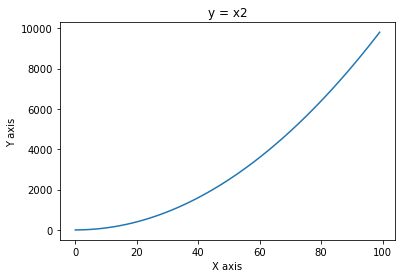

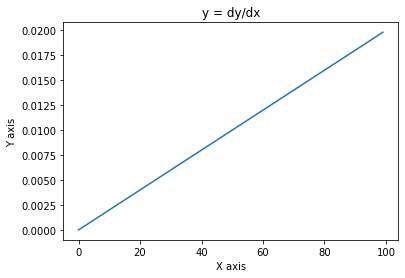

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

x = np.array([i for i in range(0,100)])

def square(x: np.ndarray) -> np.ndarray:
    '''square of each element in the array'''
    return np.power(x, 2)

def derive(func: Callable[[np.ndarray],np.ndarray],
          input_: np.ndarray,
          delta: float = 0.01) -> np.ndarray:
    return (func(input_+delta)-func(input_-delta))/2*delta

y = square(x)
dy_by_dx = derive(square, x)

plt.title('y = x2')
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.plot(x,y)
plt.show()

plt.title('y = dy/dx')
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.plot(x,dy_by_dx)
plt.show()

In [54]:
def softmax(a: np.ndarray) -> np.ndarray:
    e = np.exp(a)
    edenom = e.sum(axis=1,keepdims=True)
    return e/edenom

a = np.random.randn(20,10)
smax_of_a = softmax(a)
smax_of_a.sum(axis=1)

## Forward Propagation (No Training)
Forward propagation example with sigmoid and softmax activation

Classification rate for randomly chosen weights: 0.6306666666666667


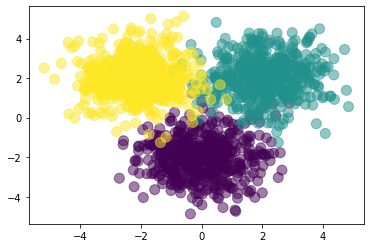

In [13]:
#forward propagation
import numpy as np
import matplotlib.pyplot as plt

# dimensions
N = 500
D = 2
M = 3
K = 3

# random gaussian initialization of samples 
# total of 1500 samples and 2 features
X1 = np.random.randn(N,D) + np.array([0,-2])
X2 = np.random.randn(N,D) + np.array([2, 2])
X3 = np.random.randn(N,D) + np.array([-2, 2])
X = np.concatenate((X1,X2,X3), axis=0)
Y = np.array([0]*N+[1]*N+[2]*N)
plt.scatter(X[:,0],X[:,1], c=Y, s=100, alpha=0.5)

# initialize random weights
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

def softmax(a: np.ndarray) -> np.ndarray:
    e = np.exp(a)
    edenom = e.sum(axis=1,keepdims=True)
    return e/edenom

def sigmoid(a: np.ndarray) -> np.ndarray:
    return 1/(1+np.exp(-a))

def forward_propagation(X: np.ndarray, W1: np.ndarray, b1: np.ndarray,
                        W2: np.ndarray,b2: np.ndarray):
    Z = sigmoid(X.dot(W1)+b1) #will be NxM - first layer operation
    P = softmax(Z.dot(W2)+b2) # second layer operation to get result
                              # totally two layers
    return P

def classification_rate(T: np.ndarray, P: np.ndarray) -> float:
    total = 0
    current = 0
    for i in range(len(T)):
        total = total + 1
        if T[i] == P[i]:
            current = current + 1
    return current/total

PY_for_X = forward_propagation(X, W1, b1, W2, b2)
P = np.argmax(PY_for_X, axis=1)

# verify we chose the correct axis
assert(len(P) == len(Y))
print("Classification rate for randomly chosen weights:", classification_rate(Y, P))
    

## Differentiation of cross entropy function


<div>
<img src="./gradient%20of%20b.png" width="500"/>
</div>

<div>
    <img src="./gradient%20of%20w.png" width="400"/>
</div>

<div>
    <img src="./gradient%20of%20v%20and%20c.png" width="400"/>
</div>


## Backward propagation with gradient ascent  (in 100 lines)

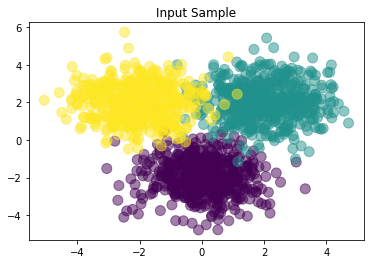

cost: -3147.180844402328 classification_rate: 0.26866666666666666
cost: -3010.961589659816 classification_rate: 0.2866666666666667
cost: -2883.631506339192 classification_rate: 0.30533333333333335
cost: -2764.2879599179823 classification_rate: 0.32266666666666666
cost: -2652.144631032829 classification_rate: 0.33466666666666667
cost: -2546.5307737882154 classification_rate: 0.3446666666666667
cost: -2446.889178889365 classification_rate: 0.354
cost: -2352.769773352208 classification_rate: 0.3586666666666667
cost: -2263.8182652832356 classification_rate: 0.368
cost: -2179.760815815704 classification_rate: 0.37933333333333336
cost: -2100.3864536707633 classification_rate: 0.39466666666666667
cost: -2025.529086766524 classification_rate: 0.4086666666666667
cost: -1955.0507012193616 classification_rate: 0.43333333333333335
cost: -1888.8268596091264 classification_rate: 0.4613333333333333
cost: -1826.7351210129825 classification_rate: 0.49
cost: -1768.6466352837585 classification_rate: 0.51

cost: -812.3673152686567 classification_rate: 0.828
cost: -810.7952454885974 classification_rate: 0.8293333333333334
cost: -809.2242823151009 classification_rate: 0.8306666666666667
cost: -807.6538983167057 classification_rate: 0.8333333333333334
cost: -806.083569875649 classification_rate: 0.8333333333333334
cost: -804.5127768900363 classification_rate: 0.834
cost: -802.9410024948837 classification_rate: 0.8373333333333334
cost: -801.3677328020361 classification_rate: 0.8373333333333334
cost: -799.7924566590242 classification_rate: 0.8386666666666667
cost: -798.214665426987 classification_rate: 0.84
cost: -796.6338527778483 classification_rate: 0.8426666666666667
cost: -795.0495145109894 classification_rate: 0.8433333333333334
cost: -793.461148389722 classification_rate: 0.8453333333333334
cost: -791.8682539979144 classification_rate: 0.8453333333333334
cost: -790.2703326171808 classification_rate: 0.8493333333333334
cost: -788.666887125089 classification_rate: 0.8506666666666667
cost

cost: -488.25502909165164 classification_rate: 0.9673333333333334
cost: -485.65720073737117 classification_rate: 0.968
cost: -483.07863862574345 classification_rate: 0.968
cost: -480.5195067518591 classification_rate: 0.9686666666666667
cost: -477.9799505126244 classification_rate: 0.9686666666666667
cost: -475.46009738114844 classification_rate: 0.9693333333333334
cost: -472.96005758123863 classification_rate: 0.9693333333333334
cost: -470.47992475930283 classification_rate: 0.9693333333333334
cost: -468.0197766513129 classification_rate: 0.9693333333333334
cost: -465.57967574278587 classification_rate: 0.9693333333333334
cost: -463.1596699200354 classification_rate: 0.9693333333333334
cost: -460.75979311120784 classification_rate: 0.9693333333333334
cost: -458.38006591585 classification_rate: 0.9693333333333334
cost: -456.02049622197666 classification_rate: 0.9693333333333334
cost: -453.6810798097805 classification_rate: 0.9693333333333334
cost: -451.36180094130344 classification_rat

cost: -285.7257019977702 classification_rate: 0.972
cost: -284.89480864005293 classification_rate: 0.972
cost: -284.07028557086176 classification_rate: 0.972
cost: -283.25206757720105 classification_rate: 0.972
cost: -282.44009026286346 classification_rate: 0.972
cost: -281.63429003677265 classification_rate: 0.972
cost: -280.8346041014878 classification_rate: 0.972
cost: -280.04097044186733 classification_rate: 0.972
cost: -279.2533278138937 classification_rate: 0.972
cost: -278.4716157336551 classification_rate: 0.972
cost: -277.6957744664879 classification_rate: 0.972
cost: -276.925745016274 classification_rate: 0.972
cost: -276.16146911489545 classification_rate: 0.972
cost: -275.4028892118442 classification_rate: 0.972
cost: -274.6499484639838 classification_rate: 0.972
cost: -273.9025907254653 classification_rate: 0.972
cost: -273.1607605377929 classification_rate: 0.972
cost: -272.4244031200391 classification_rate: 0.972
cost: -271.6934643592066 classification_rate: 0.972
cost: 

cost: -213.15250801546955 classification_rate: 0.9726666666666667
cost: -212.80829780583815 classification_rate: 0.9726666666666667
cost: -212.46601771177336 classification_rate: 0.9726666666666667
cost: -212.12565288887737 classification_rate: 0.9726666666666667
cost: -211.78718863543236 classification_rate: 0.9726666666666667
cost: -211.45061039077666 classification_rate: 0.9726666666666667
cost: -211.1159037337022 classification_rate: 0.9726666666666667
cost: -210.78305438087202 classification_rate: 0.9726666666666667
cost: -210.45204818526042 classification_rate: 0.9726666666666667
cost: -210.12287113461093 classification_rate: 0.9726666666666667
cost: -209.7955093499162 classification_rate: 0.9726666666666667
cost: -209.4699490839169 classification_rate: 0.9726666666666667
cost: -209.14617671961992 classification_rate: 0.9726666666666667
cost: -208.824178768836 classification_rate: 0.9726666666666667
cost: -208.50394187073616 classification_rate: 0.9726666666666667
cost: -208.1854

cost: -180.7158682036469 classification_rate: 0.9713333333333334
cost: -180.53454038616627 classification_rate: 0.9713333333333334
cost: -180.3540078085864 classification_rate: 0.9713333333333334
cost: -180.1742656213839 classification_rate: 0.9713333333333334
cost: -179.9953090126207 classification_rate: 0.9713333333333334
cost: -179.81713320759422 classification_rate: 0.9713333333333334
cost: -179.63973346849144 classification_rate: 0.9713333333333334
cost: -179.4631050940467 classification_rate: 0.9713333333333334
cost: -179.2872434192031 classification_rate: 0.9713333333333334
cost: -179.11214381477782 classification_rate: 0.9713333333333334
cost: -178.93780168713033 classification_rate: 0.9713333333333334
cost: -178.76421247783495 classification_rate: 0.9713333333333334
cost: -178.59137166335674 classification_rate: 0.9713333333333334
cost: -178.41927475473022 classification_rate: 0.9713333333333334
cost: -178.247917297242 classification_rate: 0.9713333333333334
cost: -178.0772948

cost: -161.77774137306022 classification_rate: 0.9713333333333334
cost: -161.6717587042048 classification_rate: 0.9713333333333334
cost: -161.56615201458777 classification_rate: 0.9713333333333334
cost: -161.46091944256128 classification_rate: 0.9713333333333334
cost: -161.35605913829494 classification_rate: 0.9713333333333334
cost: -161.25156926368462 classification_rate: 0.9713333333333334
cost: -161.14744799226207 classification_rate: 0.9713333333333334
cost: -161.04369350910574 classification_rate: 0.9713333333333334
cost: -160.94030401075184 classification_rate: 0.9713333333333334
cost: -160.8372777051069 classification_rate: 0.9713333333333334
cost: -160.73461281136042 classification_rate: 0.9713333333333334
cost: -160.6323075598986 classification_rate: 0.9713333333333334
cost: -160.53036019221906 classification_rate: 0.9713333333333334
cost: -160.42876896084607 classification_rate: 0.9713333333333334
cost: -160.32753212924632 classification_rate: 0.9713333333333334
cost: -160.22

cost: -150.8782699198942 classification_rate: 0.9713333333333334
cost: -150.8081009721231 classification_rate: 0.9713333333333334
cost: -150.73814340169656 classification_rate: 0.9713333333333334
cost: -150.66839632033867 classification_rate: 0.9713333333333334
cost: -150.5988588445719 classification_rate: 0.9713333333333334
cost: -150.5295300956854 classification_rate: 0.9713333333333334
cost: -150.46040919970343 classification_rate: 0.9713333333333334
cost: -150.3914952873547 classification_rate: 0.9713333333333334
cost: -150.32278749404102 classification_rate: 0.9713333333333334
cost: -150.2542849598069 classification_rate: 0.9713333333333334
cost: -150.18598682930914 classification_rate: 0.9713333333333334
cost: -150.11789225178637 classification_rate: 0.9713333333333334
cost: -150.0500003810294 classification_rate: 0.9713333333333334
cost: -149.98231037535146 classification_rate: 0.9713333333333334
cost: -149.91482139755846 classification_rate: 0.9713333333333334
cost: -149.847532

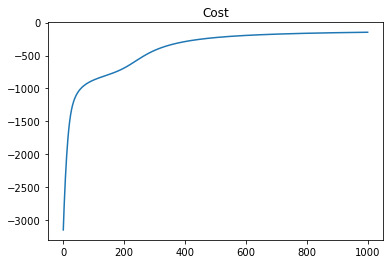

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# dimensions
N = 500
D = 2
M = 3
K = 3

np.random.seed(1)

# random gaussian initialization of samples 
# total of 1500 samples and 2 features
X1 = np.random.randn(N,D) + np.array([0,-2])
X2 = np.random.randn(N,D) + np.array([2, 2])
X3 = np.random.randn(N,D) + np.array([-2, 2])
X = np.concatenate((X1,X2,X3), axis=0)
Y = np.array([0]*N+[1]*N+[2]*N)

# turn Y into an indicator matrix for training
NN = len(Y)
T = np.zeros((NN, K))
for i in range(NN):
    T[i, Y[i]] = 1

plt.title('Input Sample')
plt.scatter(X[:,0],X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

def softmax(a: np.ndarray) -> np.ndarray:
    e = np.exp(a)
    edenom = e.sum(axis=1,keepdims=True)
    return e/edenom

def sigmoid(a: np.ndarray) -> np.ndarray:
    return 1/(1+np.exp(-a))

# I am returning both output and hiddens to use in gradient (derivative) calculations
def forward_propagation(X: np.ndarray, W1: np.ndarray, b1: np.ndarray,
                        W2: np.ndarray,b2: np.ndarray):
    Z = sigmoid(X.dot(W1)+b1) #will be NxM - first layer operation
    P = softmax(Z.dot(W2)+b2) # second layer operation to get result
                              # totally two layers
    return P, Z

def classification_rate(T: np.ndarray, P: np.ndarray) -> float:
    total = 0
    current = 0
    for i in range(len(T)):
        total = total + 1
        if T[i] == P[i]:
            current = current + 1
    return current/total

def cost(T, Y):
    total = T * np.log(Y)
    return total.sum() # sum across all axis

# initialize random weights
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

learning_rate = 10e-7
costs = []

def derivative_w2(T, Y, Z):
    return Z.T.dot(T-Y) # need MxK - MxN . NxK
def derivative_b2(T, Y):
    return np.sum(T-Y, axis=0) # need 1xK
def derivative_w1(T, Y, X, W2, Z):
    return X.T.dot((T-Y).dot(W2.T)*Z*(1-Z)) # need DxM - DxN . (NxK . KxM)
def derivative_b1(T, Y, W2, Z):
    return np.sum((T-Y).dot(W2.T)*Z*(1-Z),axis=0) # need 1xM (NxK . KxM) sum axis 0

for i in range(100000):
    # step 1 calculate forward prop and get Y and Z (Hiddens)
    output, hidden = forward_propagation(X, W1, b1, W2, b2)
    
    # step 1.1 calculate cost for every 100th epoch
    if i%100 == 0:
        c = cost(T, output)
        P = np.argmax(output,axis=1)
        r = classification_rate(Y,P)
        print("cost:", c, "classification_rate:", r)
        costs.append(c)
        
    # step 2 Apply gradient ascent to each of the network parameters (W1, W2, b1, b2)
    W2 += learning_rate* derivative_w2(T, output, hidden)
    b2 += learning_rate* derivative_b2(T, output)
    W1 += learning_rate* derivative_w1(T, output, X, W2, hidden)
    b1 += learning_rate* derivative_b1(T, output, W2, hidden)

plt.title('Cost')
plt.plot(costs)
plt.show()

## Facial expression classification using our hand made NN

In [4]:
import numpy as np
from sklearn.utils import shuffle

def get_data(Ntest=1000):
    ignore_col_names = True;
    X = [] # input features
    Y = [] # output
    for line in open("./fer2013.csv"):
        if ignore_col_names:
            ignore_col_names = False
        else:
            row = line.split(",")
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])
    X, Y =  np.array(X)/255.0, np.array(Y)
    #shuffle
    X, Y = shuffle(X, Y)
    Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
    Xvalid, Yvalid = X[-Ntest:], Y[-Ntest:]
    return Xtrain, Ytrain, Xvalid, Yvalid

## Visualize some of the images

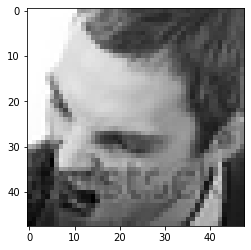

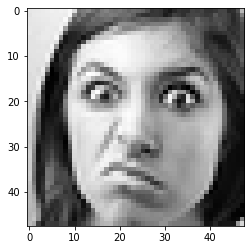

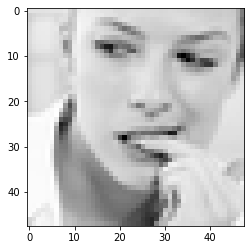

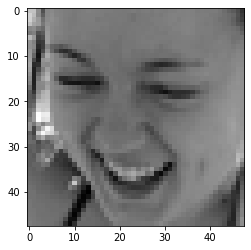

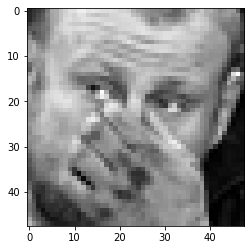

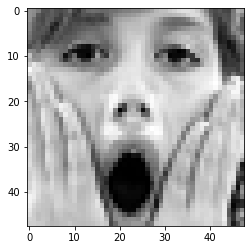

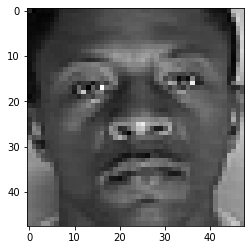

Quit? Enter Y: 
y


In [26]:
# Visualize some of the images
import matplotlib.pyplot as plt

while True:
    for i in range(7):
        x, y = Xtrain[Ytrain==i], Ytrain[Ytrain==i]
        N = len(Y)
        j = np.random.choice(N)
        plt.imshow(x[j].reshape(48,48), cmap='gray')
        plt.show()
    prompt = input("Quit? Enter Y: \n")
    if prompt.lower().startswith('y'):
        break
        

## A class based ANN with gradient descent backpropagation

In [8]:
# Build an ANN with softmax at the end to do multi class classification.
# For hiddens we will use tanh (better than sigmoid and it will not do unnecessary offset)
import matplotlib.pyplot as plt
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

def cost(T, Y):
    return -(T*np.log(Y)).sum()

def cost2(T, Y):
    # same as cost(), just uses the targets to index Y
    # instead of multiplying by a large indicator matrix with mostly 0s
    N = len(T)
    return -np.log(Y[np.arange(N), T]).mean()

def onehotencode(y):
    N = len(y)
    K = len(set(y))
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

def error_rate(targets, predictions):
    return np.mean(targets != predictions)

class ANN:
    def __init__(self, M):
        self.M = M
    
    def forward(self, X):
        Z = np.tanh(X.dot(self.W1)+self.b1)
        return softmax(Z.dot(self.W2)+self.b2), Z # output and hiddens
    
    def fit(self, X, Y, Xvalid, Yvalid, learning_rate = 1e-6, epochs=10000, show_fig=False):
        N, D = X.shape
        K = len(set(Y))
        T = onehotencode(Y)
        
        # random initialize weights
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M, K) / np.sqrt(self.M)
        self.b2 = np.zeros(K)
        
        costs = []
        best_validation_error = 1
        for i in range(epochs):
            # forward propagation and cost calculation
            P, Z = self.forward(X)
            
            # gradient ascent
            delta2 = P-T
            self.W2 -= learning_rate*(Z.T.dot(delta2))
            self.b2 -= learning_rate*(delta2.sum(axis=0))
            
            delta1 = delta2.dot(self.W2.T) * (1-Z*Z) # Z prime for tanh | * (Z>0) for relu activation
            self.W1 -= learning_rate*(X.T.dot(delta1))
            self.b1 -= learning_rate*delta1.sum(axis=0)
            
            if i%100 == 0:
                pYvalid, _ = self.forward(Xvalid)
                c = cost2(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid,axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)
        if show_fig:
            plt.title('cost')
            plt.plot(costs)
            plt.show()
        
    def predict(self, X):
        pY, _ = self.forward(X)
        return np.argmax(pY, axis=1)
    
    def score(self, X, Y):
        predictions = self.predict(X)
        return 1 - error_rate(Y, predictions)

i: 0 cost: 1.9084198330501336 error: 0.741
i: 100 cost: 1.7567702698521517 error: 0.725
i: 200 cost: 1.7354606029385855 error: 0.703
i: 300 cost: 1.7503749001482911 error: 0.689
i: 400 cost: 1.7502310813599806 error: 0.685
i: 500 cost: 1.7142045825589425 error: 0.683
i: 600 cost: 1.7095232869606525 error: 0.676
i: 700 cost: 1.6785445371684853 error: 0.66
i: 800 cost: 1.706099158924972 error: 0.68
i: 900 cost: 1.692737416148531 error: 0.657
i: 1000 cost: 1.6762763574431563 error: 0.649
i: 1100 cost: 1.6927812488386005 error: 0.648
i: 1200 cost: 1.6724878563038037 error: 0.657
i: 1300 cost: 1.6771629614696804 error: 0.648
i: 1400 cost: 1.6927419268195485 error: 0.655
i: 1500 cost: 1.668071950773507 error: 0.644
i: 1600 cost: 1.6630581817282417 error: 0.643
i: 1700 cost: 1.6564865420987502 error: 0.647
i: 1800 cost: 1.6542996482369159 error: 0.641
i: 1900 cost: 1.6887751961907171 error: 0.654
i: 2000 cost: 1.6467189808212774 error: 0.632
i: 2100 cost: 1.6810923463182648 error: 0.644
i: 22

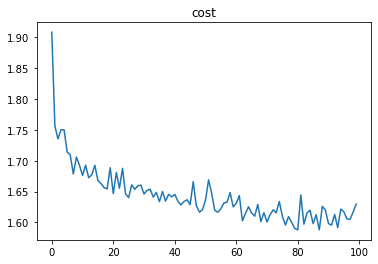

0.386


In [10]:
def main():
    Xtrain, Ytrain, Xvalid, Yvalid = get_data()
    ann = ANN(200)
    ann.fit(Xtrain, Ytrain, Xvalid, Yvalid, show_fig=True)
    print(ann.score(Xvalid, Yvalid))
    
if __name__ == '__main__':
    main()